In [321]:
import pandas as pd

In [322]:
df=pd.read_csv('FoodSupply_LivestockFish_E_All_Data.csv',sep=',', encoding='latin-1')
df.shape

(42269, 113)

In [362]:
df.tail()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Diff
42176,5817,Net Food Importing Developing Countries,2738,"Milk, Whole",664,Food supply (kcal/capita/day),kcal/capita/day,57.0,57.0,58.0,...,85.0,89.0,89.0,91.0,92.0,94.0,94.0,94.0,92.0,35.0
42239,5817,Net Food Importing Developing Countries,2949,Eggs,664,Food supply (kcal/capita/day),kcal/capita/day,4.0,4.0,4.0,...,8.0,8.0,8.0,8.0,8.0,9.0,9.0,10.0,10.0,6.0
42245,5817,Net Food Importing Developing Countries,2960,"Fish, Seafood",664,Food supply (kcal/capita/day),kcal/capita/day,10.0,11.0,11.0,...,18.0,19.0,19.0,20.0,21.0,22.0,22.0,22.0,22.0,12.0
42251,5817,Net Food Importing Developing Countries,2943,Meat,664,Food supply (kcal/capita/day),kcal/capita/day,57.0,56.0,56.0,...,74.0,77.0,81.0,84.0,85.0,87.0,88.0,87.0,88.0,31.0
42266,5817,Net Food Importing Developing Countries,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,1972.0,1999.0,2010.0,...,2387.0,2405.0,2431.0,2446.0,2467.0,2483.0,2499.0,2507.0,2512.0,540.0


In [365]:
df['Item'].value_counts()

Eggs             434
Meat             217
Fish, Seafood    217
Grand Total      217
Honey            214
Milk, Whole      213
Cheese           212
Name: Item, dtype: int64

## Prepare dataset for Tableau Dataviz

In [324]:
df=df.loc[df.Unit == 'kcal/capita/day']

In [325]:
df.drop(columns=['Y1961F','Y1962F','Y1963F','Y1964F','Y1965F','Y1966F','Y1967F','Y1968F','Y1969F','Y1970F',
                'Y1971F','Y1972F','Y1973F','Y1974F','Y1975F','Y1976F','Y1977F','Y1978F','Y1979F','Y1980F',
                'Y1981F','Y1982F','Y1983F','Y1984F','Y1985F','Y1986F','Y1987F','Y1988F','Y1989F','Y1990F',
                'Y1991F','Y1992F','Y1993F','Y1994F','Y1995F','Y1996F','Y1997F','Y1998F','Y1999F','Y2000F',
                'Y2001F','Y2002F','Y2003F','Y2004F','Y2005F','Y2006F','Y2007F','Y2008F','Y2009F','Y2010F',
                'Y2011F','Y2012F','Y2013F'],axis=1,inplace=True)

In [326]:
df.shape

(7312, 60)

In [327]:
df.Item.value_counts()
df=df.loc[(df.Item == 'Meat')|(df.Item == 'Eggs')|(df.Item == 'Cheese')|(df.Item == 'Milk, Whole')|(df.Item == 'Fish, Seafood')|
      (df.Item == 'Grand Total')|(df.Item == 'Honey')]

In [328]:
df.shape

(1724, 60)

### Check isna and drop the rows with mising values

In [329]:
df.isna().sum()

Area Code         0
Area              0
Item Code         0
Item              0
Element Code      0
Element           0
Unit              0
Y1961           238
Y1962           238
Y1963           238
Y1964           238
Y1965           238
Y1966           238
Y1967           238
Y1968           238
Y1969           238
Y1970           238
Y1971           238
Y1972           238
Y1973           238
Y1974           238
Y1975           238
Y1976           238
Y1977           238
Y1978           238
Y1979           238
Y1980           238
Y1981           238
Y1982           238
Y1983           238
Y1984           238
Y1985           238
Y1986           238
Y1987           238
Y1988           238
Y1989           238
Y1990           230
Y1991           230
Y1992            80
Y1993            72
Y1994            72
Y1995            72
Y1996            72
Y1997            72
Y1998            72
Y1999            72
Y2000            64
Y2001            64
Y2002            64
Y2003            64


In [330]:
df[df.Y2013.isna()][['Area']].sample(40)

,Area
27982,Serbia and Montenegro
2917,Belgium-Luxembourg
34901,Yugoslav SFR
8959,Czechoslovakia
11114,Ethiopia PDR
3054,Belgium-Luxembourg
35002,Yugoslav SFR
27929,Serbia and Montenegro
29613,Sudan (former)
22630,Netherlands Antilles (former)


In [331]:
#df.dropna(axis=0,inplace=True)

In [332]:
df.columns

Index(['Area Code', 'Area', 'Item Code', 'Item', 'Element Code', 'Element',
       'Unit', 'Y1961', 'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967',
       'Y1968', 'Y1969', 'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975',
       'Y1976', 'Y1977', 'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983',
       'Y1984', 'Y1985', 'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991',
       'Y1992', 'Y1993', 'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999',
       'Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007',
       'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013'],
      dtype='object')

## Viz with Tableau

In [333]:
df['Diff']=df.Y2013 - df.Y1961
df.sort_values(by='Diff',ascending=False).head(10)

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Diff
7163,41,"China, mainland",2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,1415.0,1526.0,1594.0,...,2879.0,2883.0,2919.0,2977.0,2994.0,3044.0,3081.0,3100.0,3108.0,1693.0
516,4,Algeria,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,1619.0,1569.0,1528.0,...,2958.0,3047.0,3041.0,3048.0,3110.0,3142.0,3217.0,3272.0,3296.0,1677.0
6569,351,China,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,1439.0,1547.0,1614.0,...,2883.0,2886.0,2921.0,2977.0,2995.0,3044.0,3080.0,3098.0,3108.0,1669.0
27472,194,Saudi Arabia,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,1717.0,1752.0,1791.0,...,2991.0,3045.0,3046.0,3014.0,3007.0,3124.0,3103.0,3269.0,3255.0,1538.0
38423,5302,Eastern Asia,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,1594.0,1691.0,1753.0,...,2873.0,2871.0,2906.0,2949.0,2960.0,3007.0,3043.0,3060.0,3068.0,1474.0
10470,59,Egypt,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,2076.0,2153.0,2166.0,...,3367.0,3389.0,3445.0,3490.0,3441.0,3507.0,3549.0,3561.0,3522.0,1446.0
4998,233,Burkina Faso,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,1326.0,1308.0,1452.0,...,2463.0,2559.0,2546.0,2588.0,2639.0,2681.0,2664.0,2707.0,2720.0,1394.0
21474,143,Morocco,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,2047.0,2069.0,2072.0,...,3206.0,3271.0,3251.0,3271.0,3293.0,3294.0,3349.0,3366.0,3403.0,1356.0
15480,102,Iran (Islamic Republic of),2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,1749.0,1747.0,1792.0,...,3074.0,3000.0,3028.0,3012.0,3058.0,3094.0,3051.0,3064.0,3094.0,1345.0
36407,5103,Northern Africa,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,1920.0,1988.0,1977.0,...,3034.0,3078.0,3096.0,3119.0,3116.0,3140.0,3189.0,3230.0,3228.0,1308.0


In [337]:
df['Diff']=df.Y2013 - df.Y1961
df.sort_values(by='Diff',ascending=True).head(10)

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Diff
122,2,Afghanistan,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,2999.0,2917.0,2698.0,...,1948.0,1966.0,2046.0,2041.0,2081.0,2104.0,2107.0,2100.0,2090.0,-909.0
14799,99,Iceland,2738,"Milk, Whole",664,Food supply (kcal/capita/day),kcal/capita/day,588.0,594.0,576.0,...,150.0,171.0,169.0,166.0,180.0,173.0,176.0,130.0,98.0,-490.0
19348,129,Madagascar,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,2431.0,2402.0,2459.0,...,2060.0,2083.0,2096.0,2061.0,2065.0,2068.0,2085.0,2058.0,2052.0,-379.0
5980,37,Central African Republic,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,2256.0,2217.0,2149.0,...,2026.0,2029.0,2090.0,2133.0,2139.0,2164.0,2154.0,2116.0,1879.0,-377.0
4809,27,Bulgaria,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,3172.0,3215.0,3281.0,...,2723.0,2759.0,2734.0,2782.0,2785.0,2762.0,2769.0,2777.0,2829.0,-343.0
21071,141,Mongolia,2943,Meat,664,Food supply (kcal/capita/day),kcal/capita/day,792.0,674.0,690.0,...,389.0,370.0,401.0,448.0,501.0,444.0,430.0,445.0,454.0,-338.0
11529,67,Finland,2738,"Milk, Whole",664,Food supply (kcal/capita/day),kcal/capita/day,536.0,504.0,498.0,...,231.0,233.0,227.0,230.0,229.0,234.0,227.0,221.0,210.0,-326.0
33640,234,Uruguay,2943,Meat,664,Food supply (kcal/capita/day),kcal/capita/day,679.0,633.0,636.0,...,309.0,314.0,324.0,396.0,370.0,389.0,390.0,353.0,406.0,-273.0
15784,104,Ireland,2738,"Milk, Whole",664,Food supply (kcal/capita/day),kcal/capita/day,430.0,440.0,446.0,...,315.0,265.0,260.0,231.0,241.0,196.0,158.0,142.0,157.0,-273.0
5707,33,Canada,2738,"Milk, Whole",664,Food supply (kcal/capita/day),kcal/capita/day,271.0,260.0,259.0,...,59.0,69.0,60.0,59.0,51.0,53.0,54.0,42.0,36.0,-235.0


### Save 

In [336]:
df.to_csv('Food countries dataset2.csv')

### Workwith other datasets

In [351]:
df_continent.shape

(67831, 9)

In [340]:
df_continent['Year Code'].value_counts().index.sort_values()

KeyError: 'Year Code'

Columns to drop : Domain Code, Domain, Flag Description, Flag, Year Code

In [346]:
df_continent.drop(columns=['Domain Code','Domain','Year Code','Flag','Flag Description'],axis=1,inplace=True)

KeyError: "['Domain Code' 'Domain' 'Year Code' 'Flag' 'Flag Description'] not found in axis"

In [347]:
df_continent.Element.value_counts()

Food supply (kcal/capita/day)             14680
Protein supply quantity (g/capita/day)    14680
Fat supply quantity (g/capita/day)        13545
Food supply quantity (tonnes)             12516
Food supply quantity (kg/capita/yr)       12410
Name: Element, dtype: int64

In [61]:
df_continent['Flag Description'].value_counts()

Calculated data                                                                 55315
Aggregate, may include official, semi-official, estimated or calculated data    12516
Name: Flag Description, dtype: int64

In [155]:
df_continent.dtypes

Country Code      int64
Country          object
Element Code      int64
Element          object
Item Code         int64
Item             object
Year              int64
Unit             object
Value           float64
dtype: object

### Select just food supply calories per capita per days
- Create differents datas frame: 
1. One with the 5 continents 
2. 5 per continents 

In [191]:
df_food=df_continent.loc[df_continent.Element=='Food supply (kcal/capita/day)']
dfC=df_food.loc[(df_food.Country == 'Africa')|(df_food.Country == 'Asia')|(df_food.Country == 'Oceania')|(df_food.Country == 'Europe')|(df_food.Country == 'Americas')]
dfC=dfC[['Year','Country','Item','Value']]
dfC.head()

,Year,Country,Item,Value
106,1961,Africa,Bovine Meat,37.0
107,1962,Africa,Bovine Meat,36.0
108,1963,Africa,Bovine Meat,36.0
109,1964,Africa,Bovine Meat,35.0
110,1965,Africa,Bovine Meat,36.0


In [ ]:
dfC.pivot_table

In [219]:
df_food.to_csv('food dataset Tableau.csv')

### Dataviz with matplotlib

In [196]:
import matplotlib.pyplot as plt

In [203]:
#df.pivot_table(index=['Continent','Region'], columns='Year',values=['Expression & Information','Same-Sex Relationships']

df_per_item=dfC.pivot_table(index=['Country','Item','Year'])
df_per_item.head()

Value
Country Item            Year       
Africa  Animal Products 1961  156.0
                        1962  154.0
                        1963  152.0
                        1964  154.0
                        1965  158.0

In [204]:
#df_index = df_per_item.set_index('Year')

In [205]:
def name_plot(Country, Item):
    data = df_per_item.loc[Country, Item]
    return plt.plot(data.index, data.values)

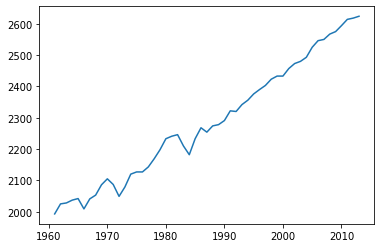

In [207]:
name_plot('Africa','Grand Total')

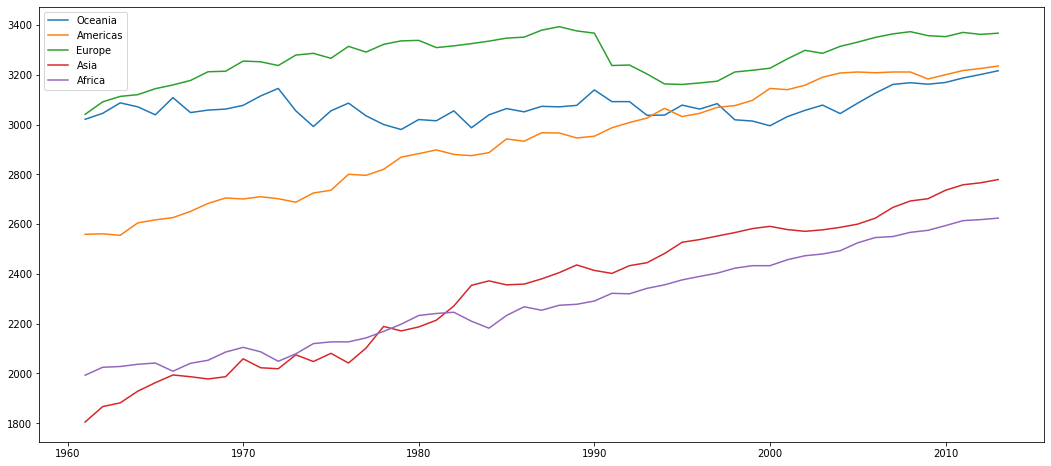

In [216]:
plt.figure(figsize = (18, 8))

continents = ['Oceania','Americas','Europe','Asia','Africa']

for cont in continents:
    name_plot(cont, 'Grand Total')

plt.legend(continents)

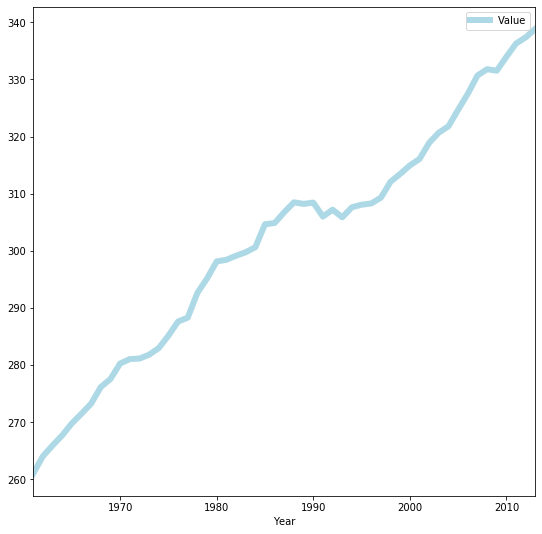

In [92]:
df_food.groupby('Year')[['Value']].mean().plot(figsize=[9,9], color= ['lightblue'],linewidth=6)
